In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
import sys
import os

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, GRU
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import TimeDistributed,Bidirectional,GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM,GRU,SimpleRNN,BatchNormalization
from tensorflow.keras import backend as K 
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

2024-05-02 12:49:54.392891: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 12:49:54.394502: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 12:49:54.439339: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 12:49:54.440039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf

import numpy as np
import os
from tensorflow import keras
#import keras
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
data_path = "/home/muhlabws4/Masaüstü/tkd_data/a2"

In [4]:
class_folders = os.listdir(data_path)

In [5]:
images = []
labels = []

In [6]:
for i , class_name in enumerate(class_folders):
    class_folder_path = os.path.join(data_path, class_name)
    class_images = os.listdir(class_folder_path)
    
    for img_name in class_images:
        img_path = os.path.join(class_folder_path, img_name)
        img = load_img(img_path, target_size=(180,320))
        img_array = img_to_array(img) /255.0
        images.append(img_array)
        labels.append(class_name)

In [7]:
X = np.array(images)
y = np.array(labels)

In [8]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)

In [9]:
X_shuf, y_shuf = X, y_encoder

In [10]:
train_images, test_images, train_labels, test_labels = train_test_split(X_shuf, y_shuf, test_size=0.2, random_state=42)

In [11]:
print(X.shape)
print(y.shape)
print(y_encoder.shape)

(183, 180, 320, 3)
(183,)
(183,)


In [12]:
#class_names = ['head_sb','head_sesor', 'other','punch','rotation']
class_names = ['head', 'other']

In [13]:
img_height=180
img_width=320
output=2

In [14]:
checkpoint_path = "best_modelX.hdf5"
checkpoint = ModelCheckpoint(checkpoint_path, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True,
                             mode='max')

In [15]:
def pretrained_Xception():
    base_model = Xception(weights="imagenet", include_top=False, input_shape = (img_height,img_width,3))
    base_model.trainable = True ## Not trainable weights
    flatten_layer = Flatten()
    dense_layer_1 = Dense(256, activation='relu')
    #dense_layer_2 = Dense(20, activation='relu')
    prediction_layer = Dense(1, activation='sigmoid')
    
    model = Sequential([
      base_model,
      flatten_layer,
      dense_layer_1,
      #dense_layer_2,
      prediction_layer
      ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',  # Binary crossentropy for binary classification
        metrics=['accuracy'],
    )
    
    return model

In [16]:
def cross_validation(model, X, y, n_splits=5, epochs=5, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    #result = []
    for train_inx, val_inx in kfold.split(X):
        X_train, X_val = X[train_inx], X[val_inx]
        y_train, y_val = y[train_inx], y[val_inx]
        
        #model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        a = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2, class_weight={0:7,1:10},callbacks=[checkpoint])
        #model.fit(X_train, y_train, epochs=epochs)
        #result.append(a.history['val_accuracy'])
        
    #return result

In [17]:
def gosterTrain(index):
    plt.figure(figsize=(15,2))
    plt.imshow(train_images[index])
    plt.title(class_names[train_labels[index]])

In [18]:
def gosterTest(index):
    plt.figure(figsize=(15,2))
    plt.imshow(test_images[index])
    plt.title(class_names[test_labels[index]])

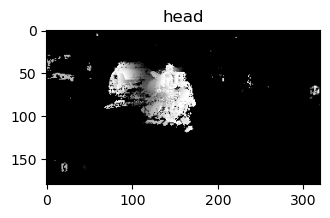

In [19]:
gosterTrain(10)

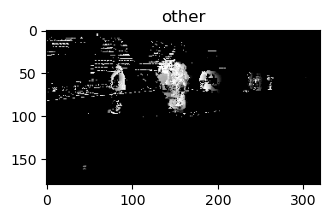

In [20]:
gosterTest(20)

In [25]:
modelX = pretrained_Xception()
result = cross_validation(modelX, train_images, train_labels, n_splits=2, epochs=7, batch_size=32)

Epoch 1/7
3/3 - 10s - loss: 46.7576 - accuracy: 0.6164 - 10s/epoch - 3s/step
Epoch 2/7
3/3 - 4s - loss: 5.8187 - accuracy: 0.8082 - 4s/epoch - 1s/step
Epoch 3/7
3/3 - 4s - loss: 5.5834 - accuracy: 0.8219 - 4s/epoch - 1s/step
Epoch 4/7
3/3 - 4s - loss: 4.6244 - accuracy: 0.8356 - 4s/epoch - 1s/step
Epoch 5/7
3/3 - 4s - loss: 7.3296 - accuracy: 0.8082 - 4s/epoch - 1s/step
Epoch 6/7
3/3 - 4s - loss: 2.3784 - accuracy: 0.9041 - 4s/epoch - 1s/step
Epoch 7/7
3/3 - 4s - loss: 2.5084 - accuracy: 0.8904 - 4s/epoch - 1s/step
Epoch 1/7
3/3 - 5s - loss: 6.2657 - accuracy: 0.8082 - 5s/epoch - 2s/step
Epoch 2/7
3/3 - 5s - loss: 2.5236 - accuracy: 0.9178 - 5s/epoch - 2s/step
Epoch 3/7
3/3 - 4s - loss: 1.5188 - accuracy: 0.9178 - 4s/epoch - 1s/step
Epoch 4/7
3/3 - 4s - loss: 0.6767 - accuracy: 0.9863 - 4s/epoch - 1s/step
Epoch 5/7
3/3 - 4s - loss: 0.2995 - accuracy: 1.0000 - 4s/epoch - 1s/step
Epoch 6/7
3/3 - 5s - loss: 0.1170 - accuracy: 1.0000 - 5s/epoch - 2s/step
Epoch 7/7
3/3 - 5s - loss: 0.0154 -

In [26]:
modelX.evaluate(test_images, test_labels)

2/2 [==============================] - 1s 77ms/step - loss: 5.0492 - accuracy: 0.6757


[5.049243450164795, 0.6756756901741028]

In [27]:
tahminlerX = modelX.predict(test_images)

2/2 [==============================] - 1s 73ms/step


In [28]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Modelinizi yükleyin
model = load_model('best_modelX.hdf5')

# Tahmin edilecek resimlerin bulunduğu dizin
image_dir = '/home/muhlabws4/dosyalar/diger/ilk'

# Dizin içindeki tüm resim dosyalarını alın
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Resimleri tahmin etmek için bir döngü
for image_file in image_files:
    # Resmi yükle ve boyutunu (180,320) yap
    img = load_img(image_file, target_size=(180, 320))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Modele uygun formata getir
    
    # Tahmini yap
    prediction = modelX.predict(img_array)
    
    # Tahminleri yazdır
    print("Tahminler for", image_file, ":", prediction)


1/1 [==============================] - 0s 40ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_3599.png : [[1.]]
1/1 [==============================] - 0s 73ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_2331.png : [[0.]]
1/1 [==============================] - 0s 56ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_1947.png : [[0.]]
1/1 [==============================] - 0s 36ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_3924.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_4543.png : [[1.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_7110.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_4042.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk

1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_6136.png : [[0.]]
1/1 [==============================] - 0s 77ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_8998.png : [[0.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_2006.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_2242.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_5723.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_4484.png : [[1.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_3658.png : [[0.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mh

1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_266.png : [[1.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_4071.png : [[0.]]
1/1 [==============================] - 0s 51ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_10384.png : [[0.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_1652.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_3275.png : [[1.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_1328.png : [[0.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_8880.png : [[1.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk

1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_10473.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_9912.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_6549.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_8909.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_9145.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_2095.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_620.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/

1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_5576.png : [[1.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_1387.png : [[0.]]
1/1 [==============================] - 0s 36ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_7582.png : [[0.]]
1/1 [==============================] - 0s 41ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_177.png : [[0.]]
1/1 [==============================] - 0s 37ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_1062.png : [[1.]]
1/1 [==============================] - 0s 38ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_8437.png : [[0.]]
1/1 [==============================] - 0s 35ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_5310.png : [[0.]]
1/1 [==============================] - 0s 36ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/m

1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_9381.png : [[1.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_885.png : [[0.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_6903.png : [[1.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_1800.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_413.png : [[0.]]
1/1 [==============================] - 0s 34ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_0_to_3481.png : [[1.]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi_30_to_3157.png : [[0.]]
1/1 [==============================] - 0s 37ms/step
Tahminler for /home/muhlabws4/dosyalar/diger/ilk/mhi

In [19]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Modelinizi yükleyin
model = load_model('best_modelMobilNet.hdf5')

# Tahmin edilecek resimlerin bulunduğu dizin
image_dir = '/home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk'

# Dizin içindeki tüm resim dosyalarını alın
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Resimleri tahmin etmek için bir döngü
for image_file in image_files:
    # Resmi yükle ve boyutunu (180,320) yap
    img = load_img(image_file, target_size=(180, 320))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Modele uygun formata getir
    
    # Tahmini yap
    prediction = model.predict(img_array)
    
    # Tahminleri yazdır
    print("Tahminler for", image_file, ":", prediction)


1/1 [==============================] - 1s 614ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_1092.png : [[1.0000000e+00 4.9575775e-09 1.0942152e-17]]
1/1 [==============================] - 0s 47ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_832.png : [[9.9999964e-01 3.6134645e-07 1.6591691e-30]]
1/1 [==============================] - 0s 32ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_248.png : [[1.000000e+00 3.829211e-08 5.817448e-28]]
1/1 [==============================] - 0s 33ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_3

1/1 [==============================] - 0s 57ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_813.png : [[9.9869883e-01 1.3011316e-03 2.2642677e-24]]
1/1 [==============================] - 0s 82ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_1226.png : [[1.0000000e+00 5.4780280e-14 2.2361879e-28]]
1/1 [==============================] - 0s 43ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi_32_bgk_head_sensor_live_cam_967.png : [[9.9836737e-01 1.6326972e-03 1.2956532e-26]]
1/1 [==============================] - 0s 81ms/step
Tahminler for /home/muhlabws4/Turkish_Open_2024_Antalya/02_13_2024/3th_court/cam_live/3th_court_live_cam_02_13_head_sensor/mhi_bgk/mhi

In [39]:
#modelX.save(checkpoint_path)

/home/muhlabws4/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
y_pred_classes = np.argmax(tahminlerX,axis=1)

In [41]:
tahminlerX[:7]

array([[4.4242755e-37],
       [0.0000000e+00],
       [7.4780875e-01],
       [3.2516635e-07],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [42]:
np.argmax(tahminlerX[9])

0

In [43]:
test_labels

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [44]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [45]:
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.49      1.00      0.65        18
           1       0.00      0.00      0.00        19

    accuracy                           0.49        37
   macro avg       0.24      0.50      0.33        37
weighted avg       0.24      0.49      0.32        37



/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/muhlabws4/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
conf_matrix = confusion_matrix(test_labels, y_pred_classes)

In [47]:
print(conf_matrix)

[[18  0]
 [19  0]]


In [48]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)

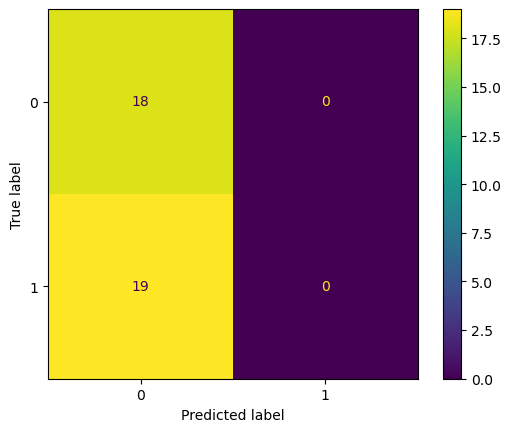

In [49]:
cm_display.plot()
plt.show() 